In [55]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [56]:
# collect data
URL_RED = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
URL_WHITE = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

reds, whites = pd.read_csv(URL_RED, sep=';'), pd.read_csv(URL_WHITE, sep=';')
reds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
reds['is_red'] = 1
whites['is_red'] = 0
df = pd.concat([reds, whites], axis=0).reset_index(drop=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


<AxesSubplot:>

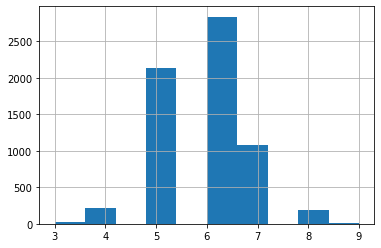

In [58]:
df['quality'].hist()

In [59]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [60]:
def apply_quality_label(x):
    if x <= 5:
        return "low"
    elif (x > 5) & (x <=6):
        return "medium"
    else:
        return "high"

<AxesSubplot:>

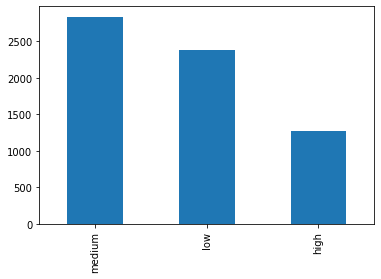

In [61]:
df['quality'] = df['quality'].apply(lambda x: apply_quality_label(x))
df['quality'].value_counts().plot(kind='bar')

In [74]:
# split up train/test data
train, test = train_test_split(df, test_size=0.2, random_state=0)
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.211112,0.340331,0.318917,5.402030,0.056147,30.570906,115.927266,0.994687,3.218037,0.531995,10.485645,0.247835
std,1.287543,0.165619,0.145061,4.664513,0.035135,17.966702,56.803135,0.002927,0.160284,0.149929,1.185198,0.431797
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996950,3.320000,0.600000,11.300000,0.000000
max,15.900000,1.580000,1.660000,31.600000,0.611000,289.000000,440.000000,1.010300,4.010000,2.000000,14.900000,1.000000


In [49]:
train, val = train_test_split(train, test_size=0.2, random_state=0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
5699,6.3,0.29,0.23,14.2,0.037,24.0,99.0,0.99528,3.08,0.38,10.6,medium,0
4078,6.6,0.24,0.30,13.0,0.052,18.0,143.0,0.99825,3.37,0.49,9.4,medium,0
3782,6.3,0.30,0.24,6.6,0.040,38.0,141.0,0.99500,3.22,0.47,9.5,low,0
6381,6.7,0.30,0.50,12.1,0.045,38.0,127.0,0.99740,3.04,0.53,8.9,medium,0
2519,7.0,0.11,0.32,4.6,0.057,59.0,144.0,0.99560,3.55,0.44,9.4,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,6.2,0.30,0.42,2.2,0.036,28.0,128.0,0.99010,3.13,0.38,11.6,medium,0
4647,7.1,0.17,0.43,1.3,0.023,33.0,132.0,0.99067,3.11,0.56,11.7,medium,0
5001,7.7,0.46,0.18,3.3,0.054,18.0,143.0,0.99392,3.12,0.51,10.8,medium,0
874,10.4,0.38,0.46,2.1,0.104,6.0,10.0,0.99664,3.12,0.65,11.8,high,1


In [69]:
def get_x_and_y(data):
    X = data.drop(['is_red', 'quality'], axis=1)
    y_red = data['is_red'].values
    y_qual = data['quality'].values
    y = (y_qual, y_red)
    return X, y

In [73]:
X_train, y_train = get_x_and_y(train)
x_test, y_test = get_x_and_y(test)
X_val, y_val = get_x_and_y(val)

In [71]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
5699,6.3,0.29,0.23,14.2,0.037,24.0,99.0,0.99528,3.08,0.38,10.6
4078,6.6,0.24,0.30,13.0,0.052,18.0,143.0,0.99825,3.37,0.49,9.4
3782,6.3,0.30,0.24,6.6,0.040,38.0,141.0,0.99500,3.22,0.47,9.5
6381,6.7,0.30,0.50,12.1,0.045,38.0,127.0,0.99740,3.04,0.53,8.9
2519,7.0,0.11,0.32,4.6,0.057,59.0,144.0,0.99560,3.55,0.44,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6389,6.2,0.30,0.42,2.2,0.036,28.0,128.0,0.99010,3.13,0.38,11.6
4647,7.1,0.17,0.43,1.3,0.023,33.0,132.0,0.99067,3.11,0.56,11.7
5001,7.7,0.46,0.18,3.3,0.054,18.0,143.0,0.99392,3.12,0.51,10.8
874,10.4,0.38,0.46,2.1,0.104,6.0,10.0,0.99664,3.12,0.65,11.8


In [72]:
y_train

(array(['medium', 'medium', 'low', ..., 'medium', 'high', 'medium'],
       dtype=object),
 array([0, 0, 0, ..., 0, 1, 0]))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)